# Project Goal

The objective of this project is to develop a recommendation engine using machine learning models. The recommendation engine will analyze key features such as **genre**, **cast**, **country**, and **description** to suggest movies or shows with similar characteristics.

By leveraging these features, the system can recommend content based on the similarity between items, improving the user experience through personalized suggestions.


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings


#NLP for descriptions
# use techniques and use a dataset for user ID for netflix
#NLP and clusters 

#transform, director, title, description --> be the input for clustering
#NLP to create clusters
#movies in the same cluster 


#maybe later I can involve popularity 

#most popular movies with a cluster 

#popularity, user_ID, time_stamp, (weekdays vs. weekends), age, gender, education, location,  

#mention that I edited the dataset 
warnings.filterwarnings("default")


In [134]:
df = pd.read_csv("Netflix_Data_V2.csv")

In [135]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,popularity,average_age_watched,gender_male
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",62,33,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",80,29,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,59,30,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",79,20,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,73,29,0


In [136]:
df.describe()

,release_year,popularity,average_age_watched,gender_male
count,8807.000000,8807.000000,8807.000000,8807.000000
mean,2014.180198,69.849324,32.566822,0.497559
std,8.819312,11.892723,7.549086,0.500022
min,1925.000000,50.000000,20.000000,0.000000
25%,2013.000000,59.000000,26.000000,0.000000
50%,2017.000000,70.000000,33.000000,0.000000
75%,2019.000000,80.000000,39.000000,1.000000
max,2021.000000,90.000000,45.000000,1.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   show_id              8807 non-null   object
 1   type                 8807 non-null   object
 2   title                8807 non-null   object
 3   director             6173 non-null   object
 4   cast                 7982 non-null   object
 5   country              7976 non-null   object
 6   date_added           8797 non-null   object
 7   release_year         8807 non-null   int64 
 8   rating               8803 non-null   object
 9   duration             8804 non-null   object
 10  listed_in            8807 non-null   object
 11  description          8807 non-null   object
 12  popularity           8807 non-null   int64 
 13  average_age_watched  8807 non-null   int64 
 14  gender_male          8807 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 1.0+ MB


In [138]:
df.select_dtypes("object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<H1> <B> Handling Missing Data </B> </H1>

In [140]:
df['director'].fillna("Unknown", inplace=True)

C:\Users\yawmo\AppData\Local\Temp\ipykernel_25760\584041027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)


In [141]:
df['cast'].fillna('Unknown',inplace=True)

C:\Users\yawmo\AppData\Local\Temp\ipykernel_25760\2343259098.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown',inplace=True)


In [142]:
df.isnull().sum() #identify missing values



show_id                  0
type                     0
title                    0
director                 0
cast                     0
country                831
date_added              10
release_year             0
rating                   4
duration                 3
listed_in                0
description              0
popularity               0
average_age_watched      0
gender_male              0
dtype: int64

In [143]:
df['country'].fillna('Unknown',inplace=True)
df['date_added'].fillna('Unknown',inplace=True)
df['rating'].fillna('Unknown',inplace=True)
df['duration'].fillna(0,inplace=True)

C:\Users\yawmo\AppData\Local\Temp\ipykernel_25760\3042460809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown',inplace=True)
C:\Users\yawmo\AppData\Local\Temp\ipykernel_25760\3042460809.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

<H1> <B> Date Processing</B> </H1>

In [145]:
#convert date added to dateitme format
df['date_added'] = df['date_added'].str.strip() #strip removes white space

In [146]:
df['date_added'] = pd.to_datetime(df['date_added'],errors ='coerce')

<H1> <B> Category Standardization</B> </H1>

In [148]:
#standarizing categories:
rating_categories = {
    'TV-MA': 'Adult', 'R': 'Adult', 'PG-13': 'Family', 'TV-14': 'Family',
    'TV-PG': 'Family', 'PG': 'Children', 'G': 'Children', 'TV-Y': 'Children'
}
df['rating_category'] = df['rating'].map(rating_categories)

<H1> <B> Analyzing Trends</B> </H1>

In [150]:
release_trends = df['release_year'].value_counts().sort_index()


In [151]:
release_trends

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

<H1> <B> Exploring Genre Information</B> </H1>

In [153]:
df['genre_list'] = df['listed_in'].apply(lambda x: x.split(', '))


In [154]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,popularity,average_age_watched,gender_male,rating_category,genre_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",62,33,1,Family,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",80,29,0,Adult,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,59,30,0,Adult,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",79,20,0,Adult,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,73,29,0,Adult,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",58,39,1,Adult,"[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",80,45,1,NaN,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,68,35,0,Adult,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",68,24,0,Children,"[Children & Family Movies, Comedies]"


<H1> <B> Outlier checking </B> </H1>

In [156]:
Q1 = df['popularity'].quantile(.25)
Q3 = df['popularity'].quantile(.75)
IQR = Q3- Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 *IQR


In [157]:
outliers = df[(df['popularity'] < lower_bound) | (df['popularity'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 0


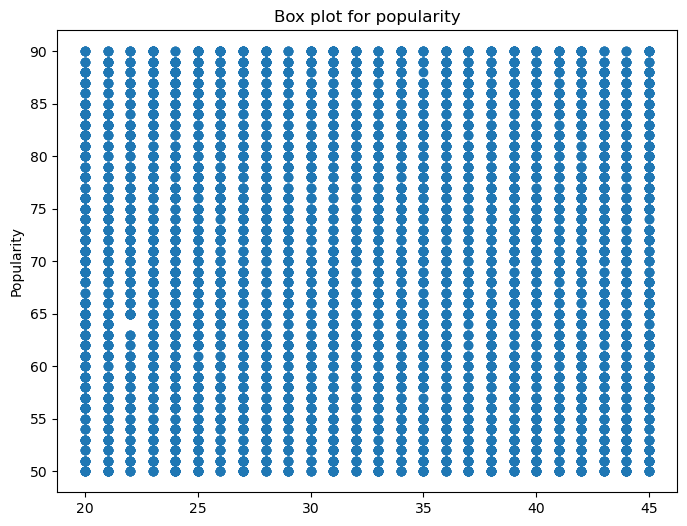

In [158]:
#scatterplots

plt.figure(figsize=(8,6))
plt.scatter(df['average_age_watched'], df['popularity'])
plt.title('Box plot for popularity')
plt.ylabel('Popularity')
plt.show()

In [159]:
#no outliers.